<a href="https://colab.research.google.com/github/Sanjana060101/PROJECTS/blob/main/Traffic_Accident_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model

In [ ]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250
train_path = '/content/drive/My Drive/BTP/btpnew/data/train'
val_path= '/content/drive/My Drive/BTP/btpnew/data/val'
test_path= '/content/drive/My Drive/BTP/btpnew/data/test'

In [ ]:
training_data = tf.keras.preprocessing.image_dataset_from_directory( train_path, seed=42, image_size= (img_height, img_width),batch_size=batch_size )

#image_size = resizes height(in form of pixel) and weight(in form of pixel) to 250, 250 
# batch_size denotes the subset size of your training sample (e.g. 100 out of 1000) which is going to be used in order to train the network during its
# learning process. Each batch trains network in a successive order, taking into account the updated weights coming from the appliance of the previous batch.
# seed = We use random seed value while creating training and test data set. The goal is to make sure we get the same training and validation data set while we
#  use different hyperparameters or machine learning algorithms in order to assess the performance of different models.
#  This is where the random seed value comes into the picture. Different Python libraries such as scikit-learn etc have different ways of assigning random seeds.

Found 791 files belonging to 2 classes.


In [ ]:
## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory( val_path,seed=42,image_size= (img_height, img_width),batch_size=batch_size )

Found 98 files belonging to 2 classes.


In [ ]:
## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 100 files belonging to 2 classes.


In [ ]:
testing_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
class_names = training_data.class_names
class_names
# Names of each of the target classes in ascending numerical order.
# Only relevant for classification.

['Accident', 'Non Accident']

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # Conv2D(f_size, filter_size, activation) # relu, sigmoid, softmax
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

# We can see that the 2D in Conv2D means each channel in the input and filter is 2 dimensional(as we see in the gif example) 
# and 1D in Conv1D means each channel in the input and filter is 1 dimensional
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Binary cross-entropy is for binary classification and categorical cross-entropy is for multi-class classification, but both work for binary classification, 
# for categorical cross-entropy you need to change data to categorical(one-hot encoding).

In [ ]:
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 250, 250, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                        

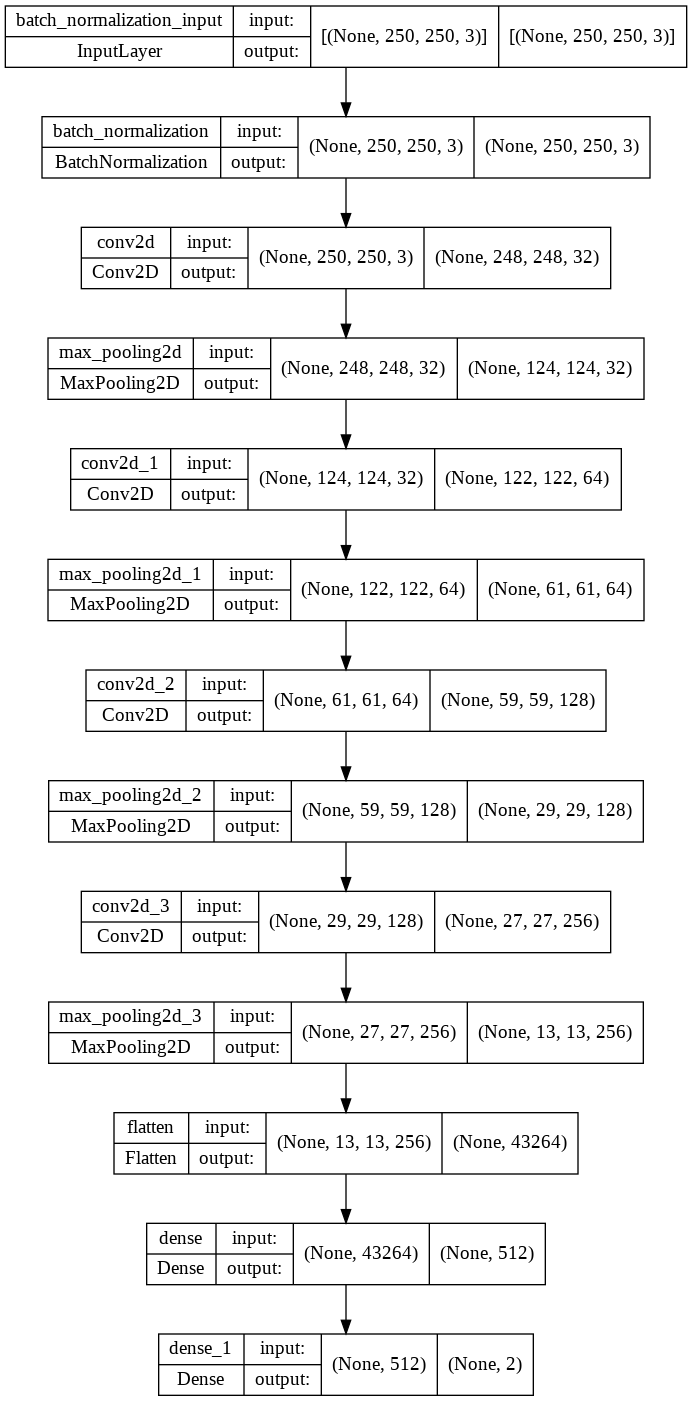

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs = 20, callbacks=callbacks_list)

# "loss" refers to the loss value over the training data after each epoch. This is what the optimization process is trying to minimize with the training so, the lower, the better.
# "accuracy" refers to the ratio between correct predictions and the total number of predictions in the training data. The higher, the better. This is normally inversely correlated with the loss,
#  but not always.

Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 3.2095 - accuracy: 0.4728 
Epoch 1: val_accuracy improved from -inf to 0.46939, saving model to model_weights.h5
8/8 [==============================] - 188s 18s/step - loss: 3.2095 - accuracy: 0.4728 - val_loss: 0.8728 - val_accuracy: 0.4694
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.5638 
Epoch 2: val_accuracy did not improve from 0.46939
8/8 [==============================] - 124s 16s/step - loss: 0.6835 - accuracy: 0.5638 - val_loss: 0.8213 - val_accuracy: 0.4694
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.6641 - accuracy: 0.5740 
Epoch 3: val_accuracy improved from 0.46939 to 0.59184, saving model to model_weights.h5
8/8 [==============================] - 124s 16s/step - loss: 0.6641 - accuracy: 0.5740 - val_loss: 0.6650 - val_accuracy: 0.5918
Epoch 4/20
8/8 [==============================] - ETA: 0s - loss: 0.6328 - accuracy: 0.6384 
Epoch 4: val_ac

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/

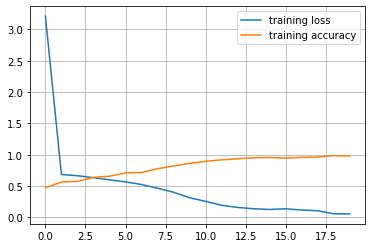

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

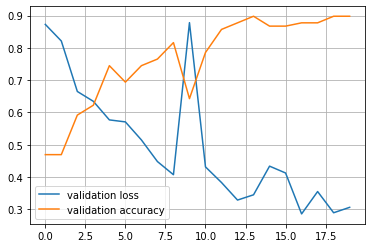

In [ ]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    count=0
    for i in range(100):
        if(predlabel[i]==class_names[labels[i]]):
          count=count+1
        # ax = plt.subplot(10, 4, i + 1)
        # plt.imshow(images[i].numpy().astype("uint8"))
        # plt.title('Pred: '+ predlabel[i]+' Actual:'+class_names[labels[i]] )
        # plt.axis('off')
        # plt.grid(True)
    print(count)

AttributeError: ignored

<Figure size 2160x2160 with 0 Axes>

In [ ]:
from keras.models import model_from_json
import numpy as np

class AccidentDetectionModel(object):

    class_nums = ['Accident', "No Accident"]

    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()

    def predict_accident(self, img):
        self.preds = self.loaded_model.predict(img)
        return AccidentDetectionModel.class_nums[np.argmax(self.preds)], self.preds

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# from detection import AccidentDetectionModel
import numpy as np
import os

model = AccidentDetectionModel("/content/drive/MyDrive/BTP/btpnew/model.json", '/content/drive/MyDrive/BTP/btpnew/model_weights.h5')
font = cv2.FONT_HERSHEY_SIMPLEX

def startapplication():
  video = cv2.VideoCapture("/content/drive/MyDrive/BTP/btpnew/6mVcTFd5TzI.mp4") # for camera use video = cv2.VideoCapture(0)

  if (video.isOpened()== False): 
    print("Error opening video stream or file")
  # Default resolutions of the frame are obtained.The default resolutions are system dependent.
  # We convert the resolutions from float to integer.
  frame_width = int(video.get(3))
  frame_height = int(video.get(4))

  # Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
  out = cv2.VideoWriter('outpy.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
  count = 0
  while video.isOpened():
    ret, frame = video.read()
    if ret == True:
      gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      roi = cv2.resize(gray_frame, (250, 250))

      pred, prob = model.predict_accident(roi[np.newaxis, :, :])
      if(pred == "Accident"):
        prob = (round(prob[0][0]*100, 2))

      # to beep when alert:
      # if(prob > 90):
      #     os.system("say beep")

        cv2.rectangle(frame, (0, 0), (280, 40), (0, 0, 0), -1)
        cv2.putText(frame, pred+" "+str(prob), (20, 30), font, 1, (255, 255, 0), 2)
        out.write(frame)
        count = count + 1
      if cv2.waitKey(33) & 0xFF == ord('q'):
        return
  # cv2_imshow(frame) 
      
    else:
      break
  print(count)

if __name__ == '__main__':
    startapplication()

945
